## 1. Loading and exploring data

In [2]:
# Import plotting modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Set default Seaborn style
sns.set()

df=pd.read_csv('Iris_data.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
# Number of rows
print(df.shape[0])

150


In [4]:
# Column names
print(df.columns.tolist())

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [5]:
# Data types
print(df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [6]:
# The str method maps the following function to each entry as a string
df['species'] = df.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [7]:
# One way to count each species
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [8]:
len(df['sepal_length'])

150

In [9]:
# Display a description of the dataset
display(df.describe())

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [10]:
np.mean(df.sepal_length)

5.843333333333335

In [11]:
df.describe().loc['mean']

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
Name: mean, dtype: float64

In [12]:
df.describe().loc['max']

sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
Name: max, dtype: float64

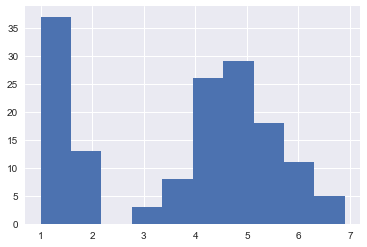

In [11]:
# Plot histogram of versicolor petal lengths
plt.hist(df.petal_length)


# Show histogram
plt.show()

## 2. Versicolor 

In [13]:
df=pd.read_csv('Iris_data.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [29]:
# Extract Series that has versicolor petal lengths
setosa = df.loc[df.species=='Iris-setosa'].drop("species",axis=1)
versicolor = df.loc[df.species=='Iris-versicolor'].drop("species",axis=1)
virginica = df.loc[df.species=='Iris-virginica'].drop("species",axis=1)

In [30]:
setosa.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

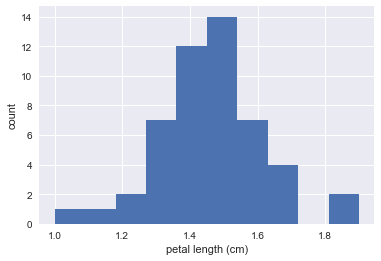

In [31]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(setosa.petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

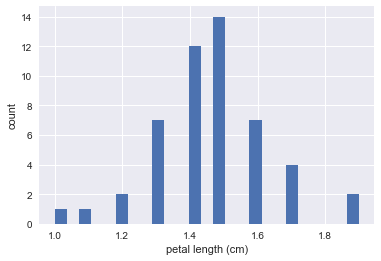

In [32]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(setosa.petal_length,bins=25)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

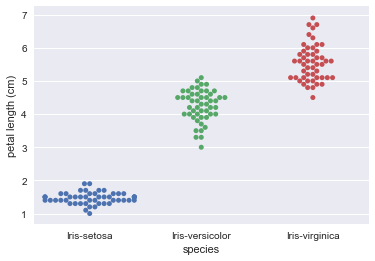

In [33]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species', y='petal_length', data=df)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

### Empirical cumulative distribution function - Hàm phân phối tích lũy 
$$ F(x)=P(X\le x)$$

In [12]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

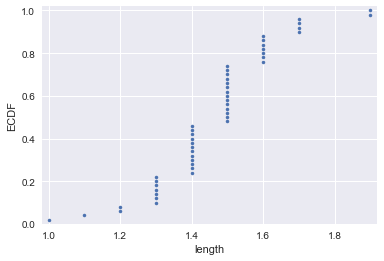

In [35]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(setosa["petal_length"])

# Generate plot
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('length')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

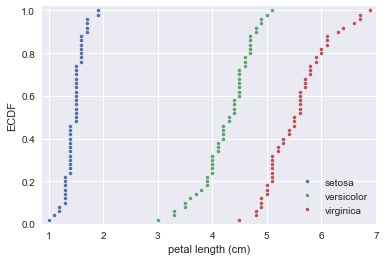

In [36]:
# Compute ECDFs
x_set, y_set = ecdf(setosa.petal_length)
x_vers, y_vers = ecdf(versicolor.petal_length)
x_virg, y_virg = ecdf(virginica.petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker = '.', linestyle = 'none')
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.plot(x_virg, y_virg, marker = '.', linestyle = 'none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [38]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor.petal_length)

# Print the result with some nice formatting
print('Iris versicolor mean:', mean_length_vers, 'cm')

Iris versicolor: 4.26 cm


In [39]:
# Compute the mean: mean_length_vers
median_length_vers = np.median(versicolor.petal_length)

# Print the result with some nice formatting
print('Iris versicolor:', median_length_vers, 'cm')

Iris versicolor: 4.35 cm


In [40]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor.petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


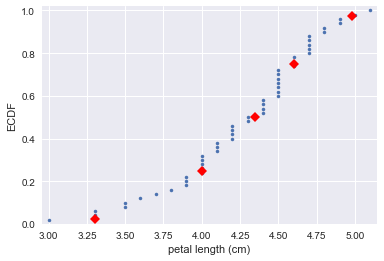

In [41]:
# Plot the ECDF
plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
plt.plot(ptiles_vers, percentiles / 100, marker='D', color='red',
             linestyle='none')

# Show the plot
plt.show()

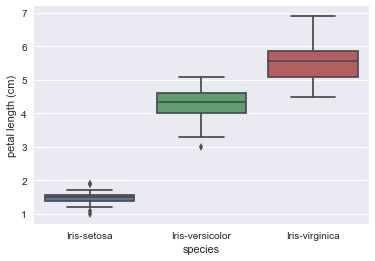

In [42]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal_length', data=df)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

In [45]:
np.random.seed(42)
random_numbers=np.random.random(size=10)
heads=random_numbers<0.5
print(heads)
print(np.sum(heads))

[ True False False False  True  True  True False False False]
4


In [46]:
np.random.binomial(4,0.5)

0

In [47]:
np.random.binomial(4,0.5)

4

In [48]:
np.random.binomial(4,0.5,size=10)

array([3, 1, 1, 1, 1, 2, 2, 1, 2, 1])

In [49]:
np.random.binomial(4,0.5,size=10)

array([1, 2, 2, 3, 1, 2, 2, 0, 2, 1])

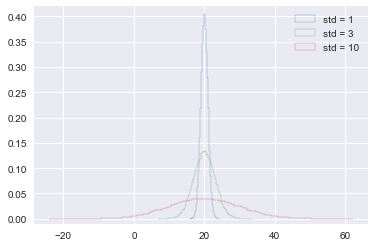

In [50]:
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

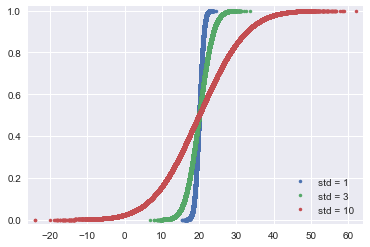

In [56]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


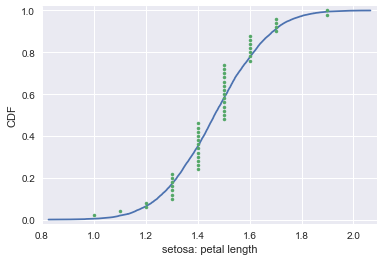

In [57]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(setosa.petal_length)
sigma = np.std(setosa.petal_length)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(setosa.petal_length)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('setosa: petal length')
_ = plt.ylabel('CDF')
plt.show()

In [58]:
np.mean(setosa.petal_length)

1.464

In [61]:
import scipy.stats as ss
ss.ttest_1samp(setosa.petal_length,1.5)

Ttest_1sampResult(statistic=-1.4671012634227616, pvalue=0.1487379411362013)

In [65]:
A=setosa.petal_length[:25]

In [66]:
B=setosa.petal_length[25:]

In [67]:
ss.ttest_ind(A,B)

Ttest_indResult(statistic=-0.16138306192096194, pvalue=0.8724690755215508)

In [68]:
# Problem: H: data['sepal_length'],data['sepal_width'] are independent
#H_0: X and Y are dependent 

p=0.1

c, pval = ss.pearsonr(setosa['sepal_length'],setosa['sepal_width'])
print("Correlation:", c)
print("p-value for non-correlation:", pval)

if p<pval:
    print("Accept H")
else:
    print("Reject H")

Correlation: 0.7467803732639268
p-value for non-correlation: 4.751986580148956e-10
Reject H
